# DSCI 614: Project 6

### Symphony Hopkins

## Introduction

We are acting as data scientists working for a Consulting Firm. We were given a dataset containing in sentiment140.csv. The data set has six columns without header:
+ the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
+ the id of the tweet (2087)
+ the date of the tweet (Sat May 16 23:58:44 UTC 2009)
+ the query (lyx). If there is no query, then this value is NO_QUERY.
+ the user that tweeted (robotickilldozr)
+ the text of the tweet ("Lyx is cool")

Our objective to create and evaluate multiple models that can forecast the polarity of the tweets.

Data Source: [Sentiment140](http://help.sentiment140.com/for-students)

## 1. Load the dataset of sentiment140.csv into memory.

Let's begin by loading the dataset into memory.

In [1]:
# importing library
import pandas as pd

In [2]:
# reading the file; we had to change the encoding from utf-8 to ISO-8859-1 because there were issues with encoding
sentiment140_df = pd.read_csv(r"sentiment140.csv", encoding='ISO-8859-1', header=None)
sentiment140_df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


As we can see, we have 6 columns without headers. Let's look at the shape of the dataframe.

In [3]:
# displaying shape
sentiment140_df.shape

(1600000, 6)

We have a large dataset containing 1.6 million rows.

## 2. Clean and preprocess the texts.

To begin, we will select all of the relevant columns into a dataframe. This will include the columns containing the polarity of the tweets (column 0) and the text of the tweets (column 5).

In [4]:
# selecting relevant columns
sentiment140_df = sentiment140_df[[0,5]]

We will give the columns names to make them easier to identify.

In [5]:
# renaming columns
sentiment140_df = sentiment140_df.rename(columns={0:'polarity', 5: 'tweet'})
sentiment140_df.head()

,polarity,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Now, we will look at the dataframe's information.

In [6]:
# displaying info
sentiment140_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   tweet     1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


Next, we will check to see if there is missing data. 

In [7]:
# checking for missing data
sentiment140_df.isnull().sum() * 100 / len(sentiment140_df)

polarity    0.0
tweet       0.0
dtype: float64

Luckily, we do not have any missing data. Now, let's check the distribution of the target.

In [8]:
# checking the target distribution
print(sentiment140_df['polarity'].value_counts(normalize=True))

0    0.5
4    0.5
Name: polarity, dtype: float64


Out of the three possible polarity values (0 = negative, 2 = neutral, 4 = positive), we only have two that are represented in dataset. However, these values are represented equally, so for this case we will conclude that the dataset is "balanced." For a balanced dataset, we can use a variety of metrics. For this project, we will rely on the accuracy metric provided by the confusion matrix and classification report.

As mentioned before, we have a large dataset comprising of 1.6 million rows. To reduce the computational time required for processing the data, we will need to extract a sample. Since the target distribution is balanced, we can create two separate dataframes based on polarity for sampling. Once we draw samples from both groups, we will combine them back into a single dataframe.

In [9]:
# creating two separate dataframes based on the polarity of the tweets
sentiment140_neg = sentiment140_df.loc[sentiment140_df['polarity']== 0]
sentiment140_pos = sentiment140_df.loc[sentiment140_df['polarity']== 4]

# sampling from the dataframes
sentiment140_neg = sentiment140_neg.sample(n=1000, random_state=42)
sentiment140_pos = sentiment140_pos.sample(n=1000, random_state=42)

# concatenating the dataframes
sentiment140_df = pd.concat([sentiment140_neg, sentiment140_pos], ignore_index=True)

In [10]:
# checking the target distribution
print(sentiment140_df['polarity'].value_counts(normalize=True))

0    0.5
4    0.5
Name: polarity, dtype: float64


Next, we will create a function to clean the texts.

In [11]:
# importing libraries
import re
from sklearn.base import TransformerMixin

In [12]:
%%time
# creating our transformer to clean the texts
class features(TransformerMixin):
    def transform(self, X, **transform_params):
        """Override the transform method to clean text"""
        return [clean_text(text) for text in X]
    
    def fit(self, X, y= None, **fit_params):
        return self
    
    def get_params(self, deep= True):
        return {}

# defining function to clean the text
def clean_text(text):
    """Removing nan, @airline, punctuation, URL, or any non alpanumeric characters and converting the text into lowercase"""
    # Remove nan, @airline, punctuation, URL, or any non alpanumeric characters and seperate word using a single space.
    text = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    # remove all the leading and trailing spaces from a string and convert the text into lowercase
    return text.strip().lower()   

# applying the function to each row of the tweet column
sentiment140_df['tweet'] = sentiment140_df['tweet'].apply(clean_text)

# displaying the results
sentiment140_df.head()

CPU times: user 10.2 ms, sys: 146 µs, total: 10.3 ms
Wall time: 10.2 ms


,polarity,tweet
0,0,oh no where did u order from that s horrible
1,0,a great hard training weekend is over a couple...
2,0,right off to work only 5 hours to go until i m...
3,0,i am craving for japanese food
4,0,jean michel jarre concert tomorrow gotta work ...


Now, we will split the data into training and test datasets (80-20 split).

In [13]:
# importing library
from sklearn.model_selection import train_test_split

In [14]:
# creating feature and label variables
X = sentiment140_df['tweet']
y = sentiment140_df['polarity']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(f'X_train dimension: {X_train.shape}; y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}; y_train dimension: {y_test.shape}')

X_train dimension: (1600,); y_train dimension: (1600,)
X_test dimension: (400,); y_train dimension: (400,)


For the last step, we will create a function that performs tokenization and lemmatization on the tweets. This function will be implemented into our models later on.

In [15]:
# importing libraries
import string
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
# loading the small model
nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# creating a tokenzer function from a given sentence
def spacy_tokenizer(sentence):
   
    # Split the sentence into tokens/words
    mytokens = nlp(sentence)
    # Removing stop words and obtain the lemma
    mytokens = [ word.lemma_ for word in mytokens if word not in stop_words]
    return mytokens

## 3. Build the first model based on pipeline using the support vector machines.

Now, we can create our first model using a simple pipeline:
+ Cleaner: Our customized cleaner function.
+ Vectorizer: A TfidfVectorizer containing our customized tokenizer, spacy_tokenizer.
+ Classifier: A support vector classification (SVC) function.

In [17]:
# importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from time import time

In [18]:
# timing our codes
t0 = time()

# overriding the string tokenization step while preserving the preprocessing and n-grams generation steps
# since we are using a customized tokenizer, the token_pattern parameter will be set to None
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range = (1,1), token_pattern=None)

# creating a support vector classifier
classifier = SVC()

# creating a pipeline based on the cleaner, vectorizer and clasifier
pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", tfidf_vector),
                 ("classifier", classifier)])

# fitting the model
pipeline.fit(X_train, y_train)

# displaying codes' time
print(f"It takes about {time() - t0:.1f} seconds")

It takes about 6.6 seconds


## 4. Check the first model. Is it a good model based on the selected evaluation metrics? Please justify your answer.

Now, we will create a confusion matrix and classification report to assess the model's performance. Since we have a balanced dataset, we will use accuraracy as our primary metric for evalutation.

In [19]:
# importing libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Confusion Matrix Without Normalization
Normalized Confusion Matrix


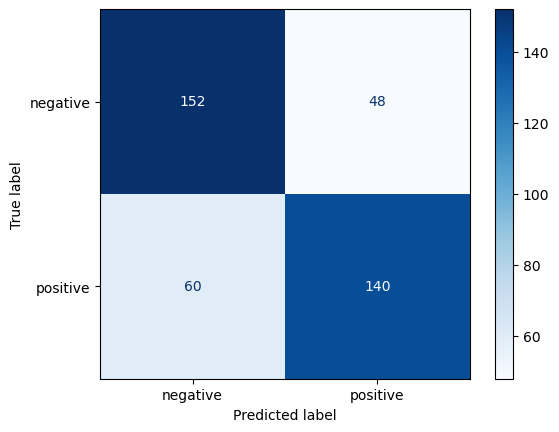

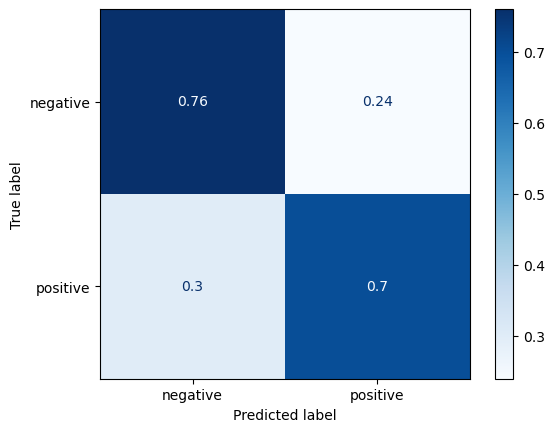

In [20]:
# specifying the target names since the y is label encodes using 0 and 4
target_names = ['negative', 'positive']

# plotting non-normalized confusion matrix and normalized confusion matrix
titles_options = [("Confusion Matrix Without Normalization", None),
                  ("Normalized Confusion Matrix", 'true')]
# looping over the two cases of confusion matrix
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues, # matplotlib Colormap
                                 # normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population
                                 normalize=normalize)
    print(title)

plt.show()


In [21]:
# creating classification report
# predicting the test data
y_pred = pipeline.predict(X_test)

# printing out the report
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.72      0.76      0.74       200
    positive       0.74      0.70      0.72       200

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



The percentage of true positives and true negatives are 70% and 76% respectively, and the model's overall accuracy was 73%. While this better than guessing, there is room for improvement.

## 5. Create the second model using pipeline, grid search CV for the hyperparameters for the estimators.

We will create a second model using the same cleaner, vectorizer, and classifier; however, this time, we will include grid search CV to find the best hyperparameters for the estimators.

In [22]:
# importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [23]:
# creating pipeline using cleaner, tf-idf and SVC
pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", TfidfVectorizer(tokenizer = spacy_tokenizer, token_pattern=None)),
                 ("classifier", SVC())])

# specifying the hyperparameters using dictionary based on the following format
# estimator/transformerName__(double understore) corresponding parameter : potential parameter
parameters = {
    'vectorizer__max_df': (0.5, 1.0),
    'vectorizer__ngram_range': ((1, 1), (1, 2)), #unigrams or bigrams
    'vectorizer__use_idf': (True, False),
    'classifier__kernel': ['linear', 'rbf']
}

# performing gridsearch CV
grid_search = GridSearchCV(pipeline, parameters, n_jobs=None, verbose=1)
print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

# timing the grid search
t0 = time()
grid_search.fit(X_train, y_train)
print(f"It takes about {time() - t0:.1f} seconds.")
print()

# printing the best score and parameters
print(f"Best score= {grid_search.best_score_:0.3f}")
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    # https://stackoverflow.com/questions/2354329/what-is-the-meaning-of-r
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
The pipeline contains: ['cleaner', 'vectorizer', 'classifier']
parameters are as follows:
{'classifier__kernel': ['linear', 'rbf'],
 'vectorizer__max_df': (0.5, 1.0),
 'vectorizer__ngram_range': ((1, 1), (1, 2)),
 'vectorizer__use_idf': (True, False)}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
It takes about 551.4 seconds.

Best score= 0.708
Best parameters set:
	classifier__kernel: 'linear'
	vectorizer__max_df: 1.0
	vectorizer__ngram_range: (1, 2)
	vectorizer__use_idf: True


## 6. Tune the second model using the support vector machines and perform model diagnostics. Is it a good model? Please justify your answer.

In the previous step, we already tuned the second model using grid search CV and found the best hyperparamers. Now, we will perform model diagnostics.

Confusion Matrix Without Normalization
Normalized Confusion Matrix


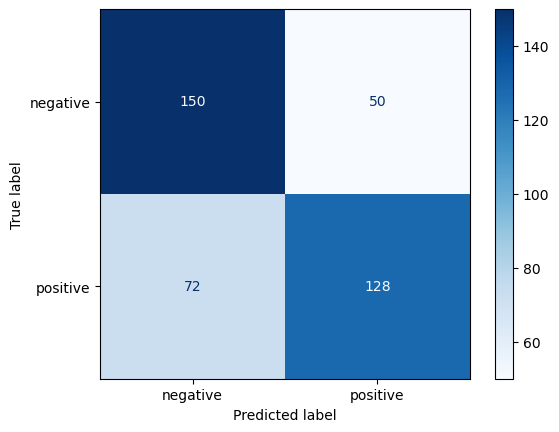

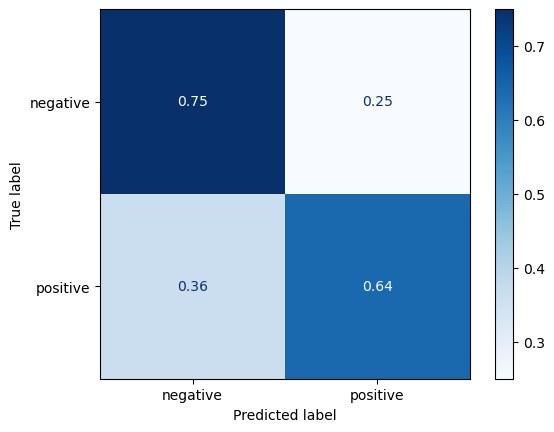

In [24]:
# plotting non-normalized confusion matrix and normalized confusion matrix
titles_options = [("Confusion Matrix Without Normalization", None),
                  ("Normalized Confusion Matrix", 'true')]
# looping over the two cases of confusion matrix
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues, # matplotlib Colormap
                                 # normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population
                                 normalize=normalize)
    print(title)

plt.show()

In [25]:
# creating classification report
# predicting the test data
y_pred = grid_search.predict(X_test)

# printing out the report
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.68      0.75      0.71       200
    positive       0.72      0.64      0.68       200

    accuracy                           0.69       400
   macro avg       0.70      0.70      0.69       400
weighted avg       0.70      0.69      0.69       400



The percentage of true positives and true negatives are 64% and 75% respectively, and the model's overall accuracy was 69%. Compared to the previous model, the model's performance declined even though we used grid search CV to find the optimal hyperparameters. We could have yielded better results if we expanded the potential range of hyperparameters; however, doing so would have required more processing time. 

## 7. Build the third model using pipeline, grid search CV, hyperparameter for the following classifiers:Logistic regression, Support Vector Machine, and Random Forest

Next, we will build a third model using multiple classifiers: Logistic Regression, Support Vector Machine, and Random Forest. To begin, we need to define a estimator class to handle different classifiers.

In [26]:
# importing libraries
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [27]:
# defining the estimator class to handle different classifiers
class ClfSwitcher(BaseEstimator):
    # initializing the estimator
    def __init__(
        self, 
        estimator = None,
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        estimator is a class variable/attribute/property;
        It is a machine learning algorithm/estimator.
        You can find all available  classification estimators in sklearn at
          https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
        """ 

        self.estimator = estimator

    # fitting the model using the given estimator
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    # predicting the label using the given estimator
    def predict(self, X, y=None):
        return self.estimator.predict(X)

    # predicting the probability using the given estimator
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    # computing the score using the given estimator
    def score(self, X, y):
        return self.estimator.score(X, y)

Now we can tune and fit the model.

In [28]:
# creating the pipeline of cleaner, tfidf and classifier to be specified by ClfSwitcher
# token_pattern=None because we have a custom tokenizer
pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", TfidfVectorizer(tokenizer = spacy_tokenizer, token_pattern=None)),
                 ("classifier", ClfSwitcher())])

# creating the hyperparameters using the following format
# For the cleaner and vectorizer:
# Estimator/transformer name__(double understore) corresponding parameter : potential parameter
# The classifier handling different classifiers has three levels
# classifier__estimator__corresponding parameter : potential parameter
parameters = [
    {
        'vectorizer__max_df': (0.5, 1.0),
        'vectorizer__ngram_range': ((1, 1), (1, 2)), #unigrams or bigrams
        'vectorizer__use_idf': (True, False),
        'classifier__estimator': [SVC()], 
    },
    {
        'vectorizer__max_df': (0.5, 1.0),
        'vectorizer__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
        'vectorizer__use_idf': (True, False),
        'classifier__estimator': [LogisticRegression()], 
    },
    {
        'vectorizer__max_df': (0.5, 1.0),
        'vectorizer__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
        'vectorizer__use_idf': (True, False),
        'classifier__estimator': [RandomForestClassifier()]
    },
]

# performing the grid search
print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

# timing grid search
t0 = time()
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs= None, return_train_score=False, verbose=3)
gscv.fit(X_train, y_train)
print(f"It takes about {time() - t0:.3f} seconds")

# printing the best parameters and score
print(f"Best score= {gscv.best_score_:0.3f}")
best_parameters = gscv.best_estimator_.get_params()

# looping over the parameters and get all potential algorithms in the pipeline
all_classifiers =[]
for parameter in parameters:
    all_classifiers.append(parameter['classifier__estimator'])
all_classifiers = [str(alg) for clf in all_classifiers for alg in clf]
print("All potential classifiers:")
pprint(all_classifiers)

# finding the location/index of the optimal classifier
idx = all_classifiers.index(str(best_parameters['classifier__estimator']))
print("Best parameters set:")
for param_name in sorted(parameters[idx].keys()):
    # https://stackoverflow.com/questions/2354329/what-is-the-meaning-of-r
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
The pipeline contains: ['cleaner', 'vectorizer', 'classifier']
parameters are as follows:
[{'classifier__estimator': [SVC()],
  'vectorizer__max_df': (0.5, 1.0),
  'vectorizer__ngram_range': ((1, 1), (1, 2)),
  'vectorizer__use_idf': (True, False)},
 {'classifier__estimator': [LogisticRegression()],
  'vectorizer__max_df': (0.5, 1.0),
  'vectorizer__ngram_range': ((1, 1), (1, 2)),
  'vectorizer__use_idf': (True, False)},
 {'classifier__estimator': [RandomForestClassifier()],
  'vectorizer__max_df': (0.5, 1.0),
  'vectorizer__ngram_range': ((1, 1), (1, 2)),
  'vectorizer__use_idf': (True, False)}]
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END classifier__estimator=SVC(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=0.703 total time=   6.6s
[CV 2/5] END classifier__estimator=SVC(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=0.684 total time=   7

[CV 4/5] END classifier__estimator=LogisticRegression(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=False;, score=0.691 total time=   6.8s
[CV 5/5] END classifier__estimator=LogisticRegression(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=False;, score=0.684 total time=   7.0s
[CV 1/5] END classifier__estimator=LogisticRegression(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=0.731 total time=   6.8s
[CV 2/5] END classifier__estimator=LogisticRegression(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=0.700 total time=   7.1s
[CV 3/5] END classifier__estimator=LogisticRegression(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, score=0.653 total time=   7.2s
[CV 4/5] END classifier__estimator=LogisticRegression(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=True;, sco

[CV 2/5] END classifier__estimator=RandomForestClassifier(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=False;, score=0.697 total time=   7.3s
[CV 3/5] END classifier__estimator=RandomForestClassifier(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=False;, score=0.641 total time=   7.2s
[CV 4/5] END classifier__estimator=RandomForestClassifier(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=False;, score=0.656 total time=   7.0s
[CV 5/5] END classifier__estimator=RandomForestClassifier(), vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), vectorizer__use_idf=False;, score=0.688 total time=   7.5s
[CV 1/5] END classifier__estimator=RandomForestClassifier(), vectorizer__max_df=1.0, vectorizer__ngram_range=(1, 1), vectorizer__use_idf=True;, score=0.669 total time=   6.5s
[CV 2/5] END classifier__estimator=RandomForestClassifier(), vectorizer__max_df=1.0, vectorizer__ngram_range=(1, 1), vect

## 8. Tune the third model and perform model diagnostics. Is it a good model? Please justify your answer.

As seen in the previous question, we already tuned the models using grid search CV. Now, we will evaluate the models based on accuracy from the confusion matrices and classification reports. 

In [29]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

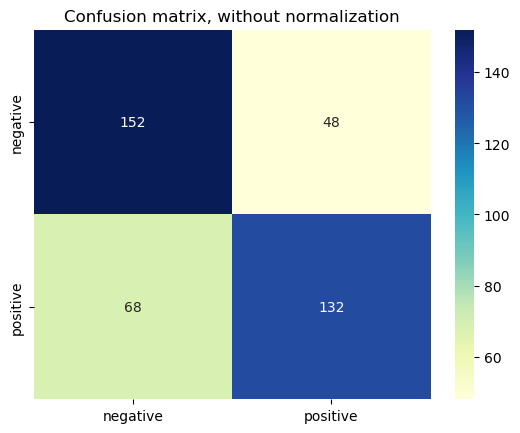

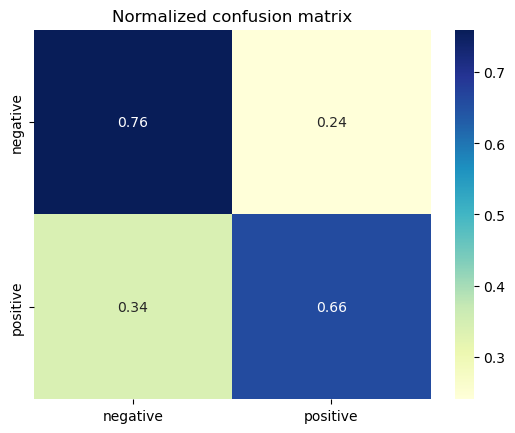

In [30]:
# predicting the labels of the test dataset
y_pred = gscv.predict(X_test)
# creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plotting the heatmap of the confusion matrix without normalization
ax = plt.axes()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
ax.set_title("Confusion matrix, without normalization")
plt.show()

# normalizing the confusion matrix
cm = cm / cm.astype(np.float64).sum(axis=1)[:,None]
# plotting the heatmap of the normalized confusion matrix
ax = plt.axes()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
ax.set_title("Normalized confusion matrix")
plt.show()

In [31]:
# displaying the classification report
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.69      0.76      0.72       200
    positive       0.73      0.66      0.69       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



The percentage of true positives and true negatives are 66% and 76% respectively, and the model's overall accuracy was 71%. Compared to the previous model, the model's performance slightly.

## Conclusion

We created three models to forecast the polarity of the tweets from the sentiment140 dataset. The overall accuracies of the models are as follows:
+ Model 1 = 73%
+ Model 2 = 69%
+ Model 3 = 71%

We determined that the best model was the first model, which contained the SVC classifier w/default parameters. It is important to note that the percentages are approximately the same (~70%), and they all have room for improvement. To enhance future models' performances, further analysis would be required to determine the best parameters. As for now, we would recommend Model 1 to the consulting firm.